In [11]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy import integrate

### Homework 3.2 - Convolution

In this homework, we will study the effect of convolution between two functions. However, we are taking the numerical approach, our answer may behave differently from the theory around the boundary if we do not have sufficient number of steps. To reduce the problem, we will use steps = 10,000.

In [12]:
steps = 100000

I have defined the following functions: 

$dd(x)$, which is an approximation of the diract delta function using Gaussian distributiion function. This is not as nearly good as the real diract delta function but should be sufficient for the problem we are doing when $\sigma$ is small.

$f(x)$ is the diract delta function repeats 5 times.

$tooth(x)$ is a half triangle function.

In [13]:
def dd(x, loc=0, sigma=0.01):
    return math.exp(-0.5 / sigma * (x - loc)**2.) / math.sqrt(2*math.pi) / sigma

def f(x):
    return dd(x, 0) + dd(x, -5) + dd(x, 5) + dd(x, -10) + dd(x, 10)

def tooth(x):
    return (x + 2.2) if abs(x) < 2.2 else 0

Let's plot $f(x)$ and $tooth(x)$.

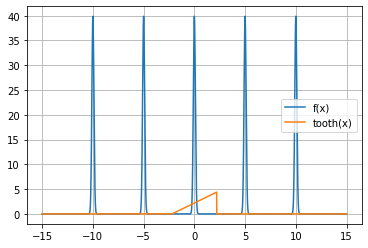

In [14]:
x = np.linspace(-15, 15, steps)
y_f = np.array([f(e) for e in x])
y_saw = [tooth(e) for e in x]

plt.plot(x, y_f, label='f(x)')
plt.plot(x, y_saw, label='tooth(x)')
plt.legend()
plt.grid()
plt.show()

**Q1: Find the convolution between $f(x)$ and $tooth(x)$ functions by plotting the answer out**, i.e.:

$$
f(x) * g(x) =\int^\infty_{-\infty}{f(x) g(t-x)}{dx}
$$

Keep in mind that you are not able to perform this integral from and to infinity so as long as the limit are sufficiently large, it should be ok. Also make sure to use sufficiently large number of steps because the $f(x)$ has sharp peaks and we cannot actually perform continuous integration on computer.

In [22]:
convolution = [ integrate.quad(lambda xx: f(xx)*tooth(t-xx), -15, 15) for t in x]

<ipython-input-22-a250ba4a381c>:1: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  convolution = [ integrate.quad(lambda xx: f(xx)*tooth(t-xx), -15, 15) for t in x]
<ipython-input-22-a250ba4a381c>:1: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  convolution = [ integrate.quad(lambda xx: f(xx)*tooth(t-xx), -15, 15) for t in x]


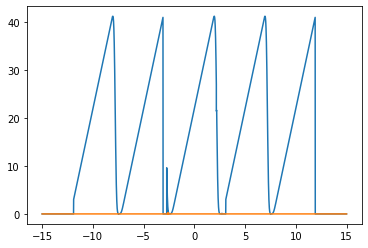

In [23]:
plt.plot(x, convolution, label='convolved')

**Q2: Can you explain the effect of the convolution from what you learn during this homework?**

The effect of the convolution shown on graph is that it combines behavior of two waves to make the third one. 